<a href="https://colab.research.google.com/github/Eugeneantientropy/ML100Days/blob/main/HW_Day_101_103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')  # 使用 16-bit 精度加快計算


In [ ]:
train_dir = '/content/drive/MyDrive/AI Training/train'
test_dir = '/content/drive/MyDrive/AI Training/test'


In [ ]:
image_size = (128, 128)
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2268 images belonging to 5 classes.
Found 565 images belonging to 5 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10) # Stop if val_loss doesn't improve for 10 epochs
# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)


history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.2949 - loss: 1.7061

142/142 ━━━━━━━━━━━━━━━━━━━━ 36s 220ms/step - accuracy: 0.2954 - loss: 1.7044 - val_accuracy: 0.5327 - val_loss: 1.1762
Epoch 2/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5190 - loss: 1.1728

142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.5192 - loss: 1.1728 - val_accuracy: 0.5363 - val_loss: 1.1439
Epoch 3/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5304 - loss: 1.1404

142/142 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.5306 - loss: 1.1399 - val_accuracy: 0.6248 - val_loss: 0.9919
Epoch 4/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - accuracy: 0.6179 - loss: 1.0071 - val_accuracy: 0.6000 - val_loss: 1.0175
Epoch 5/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - accuracy: 0.6224 - loss: 0.9547 - val_accuracy: 0.5858 - val_loss: 1.0108
Epoch 6/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.6417 - loss: 0.9250

142/142 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.6418 - loss: 0.9249 - val_accuracy: 0.6407 - val_loss: 0.9301
Epoch 7/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6870 - loss: 0.8302

142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step - accuracy: 0.6870 - loss: 0.8303 - val_accuracy: 0.6566 - val_loss: 0.9048
Epoch 8/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6913 - loss: 0.8166

142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - accuracy: 0.6913 - loss: 0.8166 - val_accuracy: 0.6796 - val_loss: 0.8634
Epoch 9/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7285 - loss: 0.7360

142/142 ━━━━━━━━━━━━━━━━━━━━ 40s 165ms/step - accuracy: 0.7284 - loss: 0.7362 - val_accuracy: 0.7027 - val_loss: 0.8453
Epoch 10/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step - accuracy: 0.7292 - loss: 0.7072 - val_accuracy: 0.6885 - val_loss: 0.8711
Epoch 11/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7306 - loss: 0.7061

142/142 ━━━━━━━━━━━━━━━━━━━━ 40s 164ms/step - accuracy: 0.7306 - loss: 0.7061 - val_accuracy: 0.7133 - val_loss: 0.8409
Epoch 12/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step - accuracy: 0.7428 - loss: 0.6751 - val_accuracy: 0.7133 - val_loss: 0.8833
Epoch 13/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7473 - loss: 0.6911

142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.7474 - loss: 0.6910 - val_accuracy: 0.7239 - val_loss: 0.8144
Epoch 14/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step - accuracy: 0.7451 - loss: 0.6419 - val_accuracy: 0.7097 - val_loss: 0.8576
Epoch 15/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.7530 - loss: 0.6298 - val_accuracy: 0.7150 - val_loss: 0.8129
Epoch 16/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.7658 - loss: 0.6082 - val_accuracy: 0.7044 - val_loss: 0.9192
Epoch 17/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - accuracy: 0.7644 - loss: 0.6140 - val_accuracy: 0.7204 - val_loss: 0.8920
Epoch 18/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 171ms/step - accuracy: 0.7945 - loss: 0.5346 - val_accuracy: 0.7080 - val_loss: 0.7960
Epoch 19/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - accuracy: 0.8133 - loss: 0.5295 - val_accuracy: 0.6991 - val_loss: 0.8461
Epoch 20/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.8046 - loss: 0.502

142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.8268 - loss: 0.4846 - val_accuracy: 0.7504 - val_loss: 0.8510
Epoch 22/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step - accuracy: 0.8211 - loss: 0.4795 - val_accuracy: 0.7292 - val_loss: 0.8347
Epoch 23/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.8373 - loss: 0.4358 - val_accuracy: 0.7221 - val_loss: 0.8408
Epoch 24/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.8403 - loss: 0.4643 - val_accuracy: 0.7274 - val_loss: 0.8863
Epoch 25/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.8191 - loss: 0.4711 - val_accuracy: 0.7292 - val_loss: 0.8545
Epoch 26/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step - accuracy: 0.8485 - loss: 0.4079 - val_accuracy: 0.7204 - val_loss: 0.8642
Epoch 27/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 23s 163ms/step - accuracy: 0.8607 - loss: 0.3745 - val_accuracy: 0.7239 - val_loss: 0.8587
Epoch 28/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.8570 - loss: 0.387

In [ ]:
import pandas as pd
import os

test_dir = "/content/drive/MyDrive/AI Training/test"
file_paths = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(".jpg")]

df_test = pd.DataFrame({"filename": file_paths})


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col="filename",
    y_col=None,  # 測試集沒有標籤
    target_size=(128, 128),
    batch_size=16,
    class_mode=None,
    shuffle=False
)

model.load_weights('best_model.h5')
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# 取得對應圖片名稱
image_filenames = df_test['filename'].tolist()

# 輸出預測結果
for filename, label in zip(image_filenames, predicted_classes):
    print(f"圖片: {filename}, 預測類別: {label}")


Found 2000 validated image filenames.
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step
圖片: /content/drive/MyDrive/AI Training/test/7fc4a7ed17211ccf688a1c85046c8efc.jpg, 預測類別: 3
圖片: /content/drive/MyDrive/AI Training/test/80aab947eab03c8004420c0b50bc7d70.jpg, 預測類別: 2
圖片: /content/drive/MyDrive/AI Training/test/806fbf16638c2e37168f77212df7c45a.jpg, 預測類別: 1
圖片: /content/drive/MyDrive/AI Training/test/80ee77ad98e18a54750821eefa9f44b7.jpg, 預測類別: 4
圖片: /content/drive/MyDrive/AI Training/test/814beaf9072de295cc7ac94907094141.jpg, 預測類別: 0
圖片: /content/drive/MyDrive/AI Training/test/81c58e4c248cdec4e40f3ca25fd63610.jpg, 預測類別: 4
圖片: /content/drive/MyDrive/AI Training/test/816e6b2934b0bc4a1f3a5612187450b3.jpg, 預測類別: 0
圖片: /content/drive/MyDrive/AI Training/test/80ebb104f4211a281d80e619d7cc12b5.jpg, 預測類別: 3
圖片: /content/drive/MyDrive/AI Training/test/81aa431c589ee09203d77313a498185d.jpg, 預測類別: 4
圖片: /content/drive/MyDrive/AI Training/test/81f73b1c9fe00627ac1b3c3a286f98de.jpg, 預測類別: 3
圖片: /content/drive/M

In [ ]:
submission = pd.DataFrame({
    'id': [os.path.splitext(os.path.basename(path))[0] for path in test_generator.filenames],  # 使用 splitext 刪除 .jpg
    'flower_class': predicted_classes
})

submission.to_csv('submission.csv', index=False)


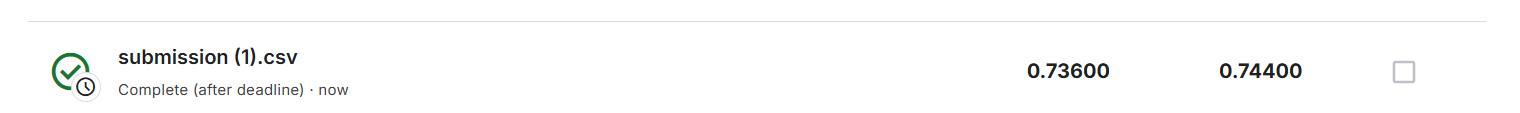